In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

import datetime, os, sys

In [2]:
df = pd.read_csv('aac_shelter_outcomes.csv',
    parse_dates=['date_of_birth','datetime','monthyear'])
df.head()


,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome
0,2 weeks,A684346,Cat,Domestic Shorthair Mix,Orange Tabby,2014-07-07,2014-07-22 16:04:00,2014-07-22 16:04:00,NaN,Partner,Transfer,Intact Male
1,1 year,A666430,Dog,Beagle Mix,White/Brown,2012-11-06,2013-11-07 11:47:00,2013-11-07 11:47:00,Lucy,Partner,Transfer,Spayed Female
2,1 year,A675708,Dog,Pit Bull,Blue/White,2013-03-31,2014-06-03 14:20:00,2014-06-03 14:20:00,*Johnny,NaN,Adoption,Neutered Male
3,9 years,A680386,Dog,Miniature Schnauzer Mix,White,2005-06-02,2014-06-15 15:50:00,2014-06-15 15:50:00,Monday,Partner,Transfer,Neutered Male
4,5 months,A683115,Other,Bat Mix,Brown,2014-01-07,2014-07-07 14:04:00,2014-07-07 14:04:00,NaN,Rabies Risk,Euthanasia,Unknown


In [3]:
df.describe()

<ipython-input-3-ea8415b8a3ee>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe()
<ipython-input-3-ea8415b8a3ee>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe()
<ipython-input-3-ea8415b8a3ee>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe()


,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome
count,78248,78256,78256,78256,78256,78256,78256,78256,54370,35963,78244,78254
unique,46,70855,5,2128,525,5869,64361,64361,14574,19,9,5
top,1 year,A718223,Dog,Domestic Shorthair Mix,Black/White,2014-05-05 00:00:00,2016-04-18 00:00:00,2016-04-18 00:00:00,Bella,Partner,Adoption,Neutered Male
freq,14355,11,44242,23335,8153,112,39,39,344,19660,33112,27784
first,NaN,NaN,NaN,NaN,NaN,1991-12-11 00:00:00,2013-10-01 09:31:00,2013-10-01 09:31:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2017-12-25 00:00:00,2018-02-01 18:44:00,2018-02-01 18:44:00,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78256 entries, 0 to 78255
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   age_upon_outcome  78248 non-null  object        
 1   animal_id         78256 non-null  object        
 2   animal_type       78256 non-null  object        
 3   breed             78256 non-null  object        
 4   color             78256 non-null  object        
 5   date_of_birth     78256 non-null  datetime64[ns]
 6   datetime          78256 non-null  datetime64[ns]
 7   monthyear         78256 non-null  datetime64[ns]
 8   name              54370 non-null  object        
 9   outcome_subtype   35963 non-null  object        
 10  outcome_type      78244 non-null  object        
 11  sex_upon_outcome  78254 non-null  object        
dtypes: datetime64[ns](3), object(9)
memory usage: 7.2+ MB


In [5]:
df.columns

Index(['age_upon_outcome', 'animal_id', 'animal_type', 'breed', 'color',
       'date_of_birth', 'datetime', 'monthyear', 'name', 'outcome_subtype',
       'outcome_type', 'sex_upon_outcome'],
      dtype='object')

In [6]:
for c in df.columns:
    print(c)
    if len(df[c].unique()) <= 12:
        display(df[c].value_counts(dropna=False))
    elif isinstance(df[c].dtype,np.int64) or isinstance(df[c].dtype,np.float64):
        display(df[c].hist())
    else:
        print(len(df[c].unique()),'distinct values')

age_upon_outcome
47 distinct values
animal_id
70855 distinct values
animal_type


Dog          44242
Cat          29422
Other         4249
Bird           334
Livestock        9
Name: animal_type, dtype: int64

breed
2128 distinct values
color
525 distinct values
date_of_birth
5869 distinct values
datetime
64361 distinct values
monthyear
64361 distinct values
name
14575 distinct values
outcome_subtype
20 distinct values
outcome_type


Adoption           33112
Transfer           23499
Return to Owner    14354
Euthanasia          6080
Died                 680
Disposal             307
Rto-Adopt            150
Missing               46
Relocate              16
NaN                   12
Name: outcome_type, dtype: int64

sex_upon_outcome


Neutered Male    27784
Spayed Female    25203
Intact Male       9549
Intact Female     9143
Unknown           6575
NaN                  2
Name: sex_upon_outcome, dtype: int64

In [7]:
df.columns

Index(['age_upon_outcome', 'animal_id', 'animal_type', 'breed', 'color',
       'date_of_birth', 'datetime', 'monthyear', 'name', 'outcome_subtype',
       'outcome_type', 'sex_upon_outcome'],
      dtype='object')

In [8]:
df.outcome_type.value_counts(dropna=False)

Adoption           33112
Transfer           23499
Return to Owner    14354
Euthanasia          6080
Died                 680
Disposal             307
Rto-Adopt            150
Missing               46
Relocate              16
NaN                   12
Name: outcome_type, dtype: int64

<AxesSubplot:>

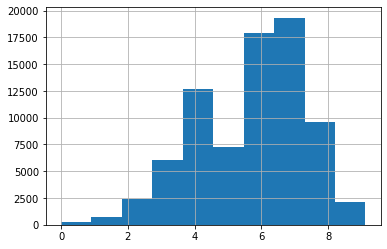

In [9]:
def process_age(x):
    if pd.isna(x):
        return np.nan
    n, s = x.split(" ")
    length_map = {
        'day':1,
        'week':7,
        'month':30,
        'year':365,
    }
    return int(n) * length_map[s.strip('s')]

df.age_upon_outcome.apply(process_age).apply(lambda x: np.log(1+x)).hist()

In [10]:
df[df.age_upon_outcome.apply(process_age) <= 0].age_upon_outcome.value_counts()

0 years    95
Name: age_upon_outcome, dtype: int64

In [11]:
df['sex'] = df.sex_upon_outcome.apply(lambda s: np.nan if pd.isna(s) else s.split(" ")[-1])
df['neuter_status'] = df.sex_upon_outcome.apply(lambda s: np.nan if pd.isna(s) else s.split(" ")[0])

In [12]:
px.bar(df.sex.fillna('No entry').value_counts(dropna=False))

In [13]:
def gen_pie_chart(inp_df,col):
    vc = inp_df[col].value_counts(dropna=False).reset_index()
    vc[[col,'count']] = vc[['index',col]]
    vc = vc.sort_values(by='count')
    return px.pie(vc,values='count',names=col)

In [14]:
gen_pie_chart(df,'sex')

In [15]:
gen_pie_chart(df,'outcome_type')

In [16]:
px.bar(df.outcome_type.fillna('No entry').value_counts(dropna=False))

In [17]:
df.groupby(['outcome_type','outcome_subtype'],dropna=False).count().animal_id

outcome_type     outcome_subtype    
Adoption         Barn                       1
                 Foster                  5558
                 Offsite                  367
                 NaN                    27186
Died             At Vet                    33
                 Enroute                   45
                 In Foster                164
                 In Kennel                335
                 In Surgery                16
                 NaN                       87
Disposal         NaN                      307
Euthanasia       Aggressive               506
                 At Vet                    26
                 Behavior                 142
                 Court/Investigation       18
                 Medical                  259
                 Rabies Risk             2417
                 Suffering               2514
                 Underage                  28
                 NaN                      170
Missing          In Foster                 

In [18]:
df.columns

Index(['age_upon_outcome', 'animal_id', 'animal_type', 'breed', 'color',
       'date_of_birth', 'datetime', 'monthyear', 'name', 'outcome_subtype',
       'outcome_type', 'sex_upon_outcome', 'sex', 'neuter_status'],
      dtype='object')

In [19]:
df.animal_id.value_counts().value_counts()

1     64990
2      4771
3       812
4       184
5        62
6        24
7         6
8         3
11        2
10        1
Name: animal_id, dtype: int64

In [20]:
(df.animal_id.value_counts() >= 2).index

Index(['A718223', 'A706536', 'A721033', 'A616444', 'A694501', 'A716018',
       'A735601', 'A738324', 'A683108', 'A701901',
       ...
       'A696230', 'A758565', 'A713713', 'A760899', 'A755247', 'A688450',
       'A669531', 'A728512', 'A709379', 'A673970'],
      dtype='object', length=70855)

In [21]:
df[df.animal_id == 'A697910'].sort_values(by='datetime')[['age_upon_outcome','datetime','outcome_type','outcome_subtype','sex_upon_outcome']]


,age_upon_outcome,datetime,outcome_type,outcome_subtype,sex_upon_outcome
26375,2 years,2015-03-10 15:00:00,Transfer,Partner,Neutered Male
43919,2 years,2015-06-11 13:23:00,Return to Owner,NaN,Neutered Male
34851,2 years,2015-06-23 13:38:00,Return to Owner,NaN,Neutered Male
75192,2 years,2015-11-05 15:08:00,Transfer,Partner,Neutered Male
34717,4 years,2017-04-21 16:08:00,Return to Owner,NaN,Neutered Male


In [33]:
vcs = df[df.animal_type == 'Other'].breed.apply(lambda s: s.replace('Mix','').strip()).value_counts()
dict(vcs)

{'Bat': 2085,
 'Raccoon': 695,
 'Rabbit Sh': 323,
 'Opossum': 278,
 'Guinea Pig': 150,
 'Skunk': 120,
 'Squirrel': 106,
 'Fox': 65,
 'Rat': 56,
 'Hamster': 40,
 'Californian': 31,
 'Ferret': 31,
 'Lionhead': 22,
 'Turtle': 20,
 'Rex': 19,
 'Snake': 19,
 'Rabbit Lh': 14,
 'English Spot': 13,
 'Coyote': 13,
 'Lizard': 13,
 'Lop-English': 11,
 'Armadillo': 9,
 'Tortoise': 8,
 'Lop-Holland': 8,
 'Havana': 7,
 'Lop-Mini': 6,
 'Gerbil': 6,
 'Tarantula': 6,
 'Netherlnd Dwarf': 6,
 'New Zealand Wht': 6,
 'Dutch': 5,
 'Cold Water': 5,
 'Chinchilla': 4,
 'Hotot': 4,
 'Rex-Mini': 3,
 'Cottontail': 3,
 'American': 3,
 'Cinnamon': 3,
 'Harlequin': 2,
 'Chinchilla-Stnd': 2,
 'Angora-English': 2,
 'Jersey Wooly': 2,
 'American Sable': 2,
 'Flemish Giant': 2,
 'Polish': 1,
 'Checkered Giant': 1,
 'Frog': 1,
 'Dutch/Angora-Satin': 1,
 'Dutch/Rabbit Sh': 1,
 'Silver': 1,
 'Rabbit Sh/Lop-Mini': 1,
 'Mouse': 1,
 'Lop-Amer Fuzzy': 1,
 'Belgian Hare': 1,
 'Sugar Glider': 1,
 'Hedgehog': 1,
 'Tropical': 1,
 

In [27]:
df[df.breed.apply(lambda s: s.replace('Mix','').strip()) == 'Rabbit Lh']

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome,sex,neuter_status
3928,1 year,A664011,Other,Rabbit Lh Mix,White,2012-09-27,2013-10-23 17:03:00,2013-10-23 17:03:00,*Cypress,Partner,Transfer,Intact Female,Female,Intact
15598,5 months,A682388,Other,Rabbit Lh Mix,Gray,2013-12-27,2014-06-27 18:18:00,2014-06-27 18:18:00,NaN,Partner,Transfer,Unknown,Unknown,Unknown
23015,1 year,A698761,Other,Rabbit Lh,White/Black,2014-03-17,2015-03-22 12:01:00,2015-03-22 12:01:00,NaN,Partner,Transfer,Intact Female,Female,Intact
29802,1 year,A754908,Other,Rabbit Lh Mix,Blue/White,2016-07-26,2017-08-15 14:07:00,2017-08-15 14:07:00,*Toots,NaN,Adoption,Spayed Female,Female,Spayed
37031,2 days,A759001,Other,Rabbit Lh Mix,Black,2017-09-23,2017-09-25 12:07:00,2017-09-25 12:07:00,Aspen,Partner,Transfer,Intact Female,Female,Intact
40461,2 years,A757387,Other,Rabbit Lh Mix,White,2015-09-01,2017-09-19 13:15:00,2017-09-19 13:15:00,R8,Partner,Transfer,Intact Female,Female,Intact
43646,2 years,A757383,Other,Rabbit Lh Mix,Black,2015-09-01,2017-09-19 13:17:00,2017-09-19 13:17:00,R6,Partner,Transfer,Intact Male,Male,Intact
49179,2 days,A758999,Other,Rabbit Lh Mix,White/Gray,2017-09-23,2017-09-25 12:08:00,2017-09-25 12:08:00,Denver,Partner,Transfer,Intact Male,Male,Intact
51762,1 year,A730336,Other,Rabbit Lh Mix,White,2015-07-02,2016-09-10 13:58:00,2016-09-10 13:58:00,*Holli,NaN,Adoption,Spayed Female,Female,Spayed
54634,2 days,A759002,Other,Rabbit Lh Mix,Black,2017-09-23,2017-09-25 12:07:00,2017-09-25 12:07:00,Aspen,Partner,Transfer,Intact Female,Female,Intact


In [37]:
for c in df.animal_type.unique():
    print(c)
    display(df[df.animal_type == c].color.value_counts())

Cat


Brown Tabby                4445
Black                      3847
Black/White                2804
Brown Tabby/White          2338
Orange Tabby               2180
                           ... 
Blue Point/Cream              1
Calico/Calico                 1
Tortie Point/Lynx Point       1
Lynx Point/Tortie Point       1
Flame Point/Cream             1
Name: color, Length: 231, dtype: int64

Dog


Black/White              5087
Black                    2479
Brown/White              2392
Tan/White                2382
White                    2313
                         ... 
Orange                      1
Tricolor/Blue Tick          1
Fawn/Chocolate              1
Blue Cream/Blue Tiger       1
Red Tick/Brown Merle        1
Name: color, Length: 336, dtype: int64

Other


Brown             1636
Brown/Black        312
Gray/Black         266
Black              252
Black/White        251
                  ... 
White/Pink           1
Orange/Brown         1
Black/Tan            1
Tricolor/Black       1
Tricolor/Gray        1
Name: color, Length: 110, dtype: int64

Bird


White           38
Brown           26
Gray            25
Black           22
Red             17
                ..
Black/Yellow     1
White/Yellow     1
Tan/Red          1
Blue/Yellow      1
Blue/Gray        1
Name: color, Length: 71, dtype: int64

Livestock


Black/White    3
Black          2
Pink           1
Brown          1
Liver/Cream    1
White          1
Name: color, dtype: int64

In [38]:
df[df.animal_type == 'Livestock']

,age_upon_outcome,animal_id,animal_type,breed,color,date_of_birth,datetime,monthyear,name,outcome_subtype,outcome_type,sex_upon_outcome,sex,neuter_status
2240,6 months,A668167,Livestock,Pig Mix,Black/White,2013-05-28,2013-11-30 12:18:00,2013-11-30 12:18:00,NaN,NaN,Return to Owner,Intact Female,Female,Intact
11609,6 months,A679540,Livestock,Goat Mix,Black,2013-11-22,2014-06-17 10:30:00,2014-06-17 10:30:00,NaN,Partner,Transfer,Intact Male,Male,Intact
17291,5 years,A663228,Livestock,Miniature,Liver/Cream,2008-09-15,2013-10-03 10:59:00,2013-10-03 10:59:00,NaN,Partner,Transfer,Intact Male,Male,Intact
19396,1 year,A673651,Livestock,Pig Mix,Black/White,2013-02-28,2014-03-11 14:39:00,2014-03-11 14:39:00,NaN,Foster,Adoption,Neutered Male,Male,Neutered
22609,5 weeks,A674214,Livestock,Pig Mix,Black,2014-02-22,2014-03-29 14:00:00,2014-03-29 14:00:00,NaN,Foster,Adoption,Unknown,Unknown,Unknown
31005,2 years,A701250,Livestock,Pig Mix,Pink,2013-04-26,2015-05-11 00:00:00,2015-05-11 00:00:00,NaN,Partner,Transfer,Intact Female,Female,Intact
42901,1 year,A715047,Livestock,Goat Mix,Brown,2014-10-30,2015-12-07 00:00:00,2015-12-07 00:00:00,NaN,Partner,Transfer,Unknown,Unknown,Unknown
43388,7 months,A742204,Livestock,Potbelly Pig Mix,Black/White,2016-07-17,2017-03-15 12:49:00,2017-03-15 12:49:00,NaN,Partner,Transfer,Intact Female,Female,Intact
60692,1 year,A718910,Livestock,Pig Mix,White,2015-01-09,2016-01-27 00:00:00,2016-01-27 00:00:00,NaN,Partner,Transfer,Intact Male,Male,Intact


In [39]:
px.pie(df.outcome_type.value_counts().reset_index(), names='index', values='outcome_type')

In [40]:
df.outcome_type.value_counts().reset_index()


,index,outcome_type
0,Adoption,33112
1,Transfer,23499
2,Return to Owner,14354
3,Euthanasia,6080
4,Died,680
5,Disposal,307
6,Rto-Adopt,150
7,Missing,46
8,Relocate,16
